# Image-to-Image using Stable Diffusion 1.5

<a target="_blank" href="https://colab.research.google.com/github/simonguest/CS-394/blob/main/src/04/notebooks/image-to-image-sd-1.5.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<a target="_blank" href="https://github.com/simonguest/CS-394/raw/refs/heads/main/src/04/notebooks/image-to-image-sd-1.5.ipynb">
  <img src="https://img.shields.io/badge/Download_.ipynb-blue" alt="Download .ipynb"/>
</a>

In [1]:
# @title Install dependencies
!uv pip install -q diffusers["torch"]==0.35.1 transformers==4.56.2 accelerate==1.10.1

## Load SD 1.5 model using pipeline

In [2]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline

# Load the img2img pipeline
print("Loading Stable Diffusion img2img pipeline...")
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    dtype=torch.float16
)
pipe = pipe.to("cuda")


Loading Stable Diffusion img2img pipeline...


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Generate Intermediate Images

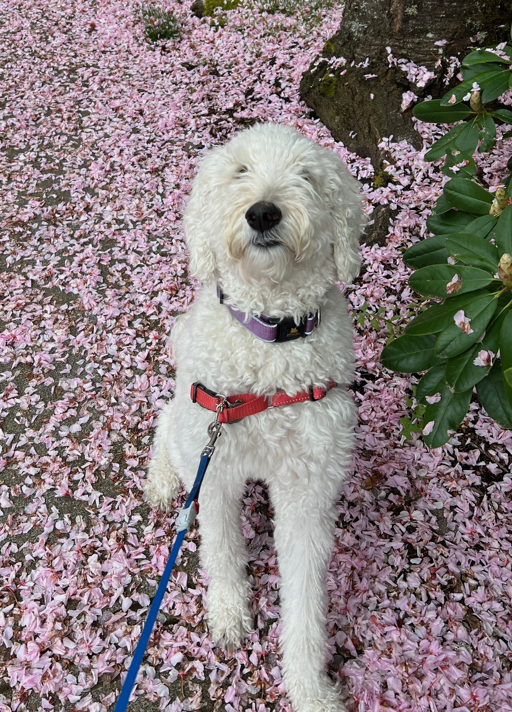

In [2]:
from PIL import Image
import requests
from io import BytesIO

IMAGE_URL = "https://raw.githubusercontent.com/simonguest/CS-394/refs/heads/main/src/04/images/luna.jpg"
SEED = 128763
PROMPT = "a goldendoodle wearing sunglasses, high quality, detailed"
NEGATIVE_PROMPT = "blurry, low quality, distorted"

response = requests.get(IMAGE_URL)
init_image = Image.open(BytesIO(response.content)).convert("RGB")

# Resize to standard size for faster processing
init_image = init_image.resize((512, 712))

display(init_image)

## Function to generate using strength param

In [17]:
def generate_image(strength):
  return pipe(
      prompt=PROMPT,
      negative_prompt=NEGATIVE_PROMPT,
      image=init_image,
      strength=strength,
      guidance_scale=7.5,
      num_inference_steps=30,
      generator=torch.Generator().manual_seed(SEED) if SEED != -1 else None,
  ).images[0]

## Strength 0.3

  0%|          | 0/9 [00:00<?, ?it/s]

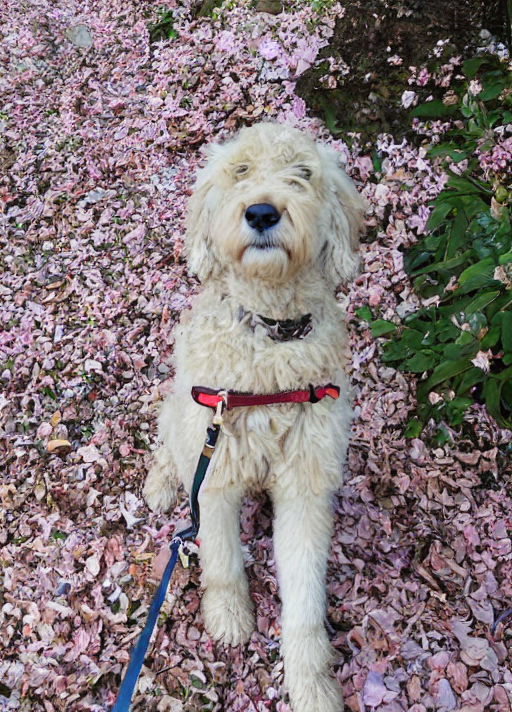

In [18]:
display(generate_image(0.3))

## Strength 0.5

  0%|          | 0/15 [00:00<?, ?it/s]

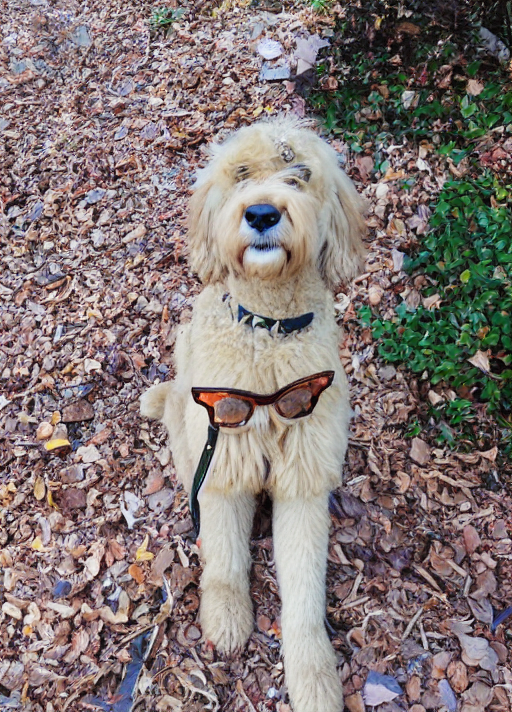

In [19]:
display(generate_image(0.5))

## Strength 0.7

  0%|          | 0/21 [00:00<?, ?it/s]

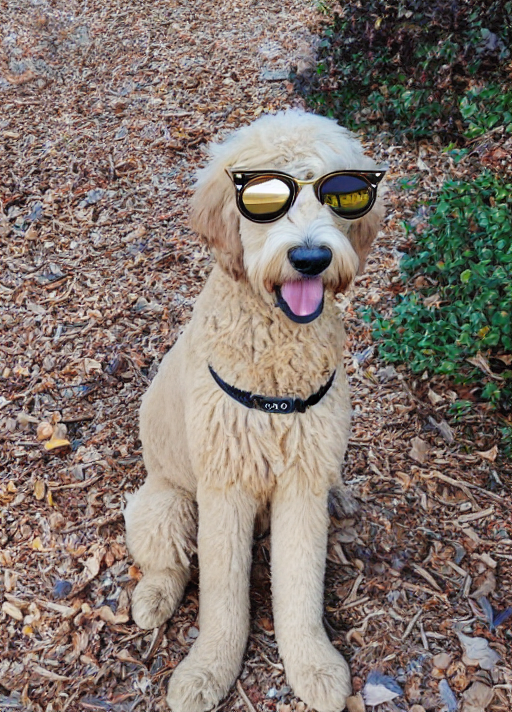

In [20]:
display(generate_image(0.7))

## Strength 0.9

  0%|          | 0/27 [00:00<?, ?it/s]

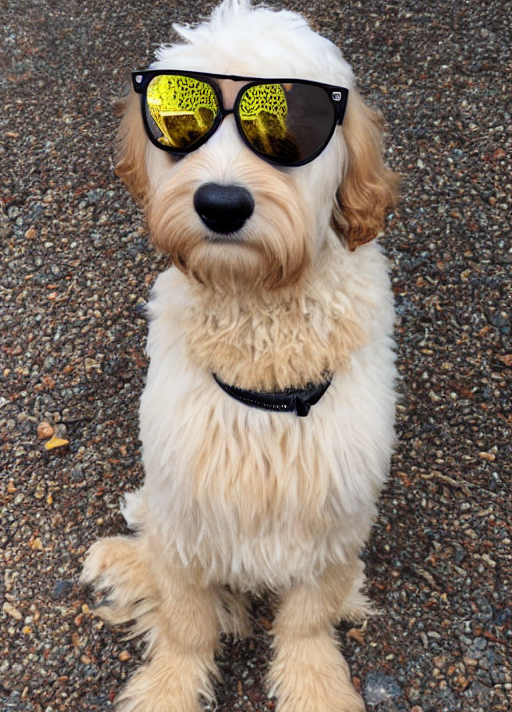

In [21]:
display(generate_image(0.9))